In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import train_test_split
import subprocess

In [32]:
station = "W 47 St & 10 Ave"
#station = "E 72 St & Park Ave"

### Encode features matrix

In [33]:
df = pd.read_csv('features_' + station.replace(" ","_") + '.csv')
df.head(5)

,lastCommunicationTime,latitude,longitude,availableBikes,availableDocks,statusValue,TS_year,TS_month,TS_day,TS_hour,TS_minute,timestamp,weekday,temperature,humidity,precipProbability,cloudCover,icon,windSpeed,ozone
0,2016-07-14 01:54:17 PM,40.762699,-73.993012,0.0,24.0,In Service,2016.0,7.0,14.0,17.0,55.0,2016-07-14 17:55:00,3.0,83.93,0.73,0.0,0.31,partly-cloudy-day,5.97,320.92
1,2016-07-14 01:56:45 PM,40.762699,-73.993012,1.0,23.0,In Service,2016.0,7.0,14.0,18.0,0.0,2016-07-14 18:00:00,3.0,84.32,0.73,0.0,0.33,partly-cloudy-day,5.76,320.92
2,2016-07-14 02:04:41 PM,40.762699,-73.993012,1.0,23.0,In Service,2016.0,7.0,14.0,18.0,5.0,2016-07-14 18:05:00,3.0,84.12,0.73,0.0,0.35,partly-cloudy-day,8.90,320.99
3,2016-07-14 02:06:36 PM,40.762699,-73.993012,2.0,22.0,In Service,2016.0,7.0,14.0,18.0,10.0,2016-07-14 18:10:00,3.0,84.22,0.73,0.0,0.37,partly-cloudy-day,8.97,321.07
4,2016-07-14 02:12:28 PM,40.762699,-73.993012,3.0,21.0,In Service,2016.0,7.0,14.0,18.0,15.0,2016-07-14 18:15:00,3.0,84.87,0.71,0.0,0.26,partly-cloudy-day,8.57,321.14


In [34]:
df['empty'] = df['availableBikes'] == 0
df['full'] = df['availableDocks'] == 0
#df[df['empty'] == True]

try:
    df = df.drop('TS_day',1)
except:
    pass

df.head(5)

,lastCommunicationTime,latitude,longitude,availableBikes,availableDocks,statusValue,TS_year,TS_month,TS_hour,TS_minute,...,weekday,temperature,humidity,precipProbability,cloudCover,icon,windSpeed,ozone,empty,full
0,2016-07-14 01:54:17 PM,40.762699,-73.993012,0.0,24.0,In Service,2016.0,7.0,17.0,55.0,...,3.0,83.93,0.73,0.0,0.31,partly-cloudy-day,5.97,320.92,True,False
1,2016-07-14 01:56:45 PM,40.762699,-73.993012,1.0,23.0,In Service,2016.0,7.0,18.0,0.0,...,3.0,84.32,0.73,0.0,0.33,partly-cloudy-day,5.76,320.92,False,False
2,2016-07-14 02:04:41 PM,40.762699,-73.993012,1.0,23.0,In Service,2016.0,7.0,18.0,5.0,...,3.0,84.12,0.73,0.0,0.35,partly-cloudy-day,8.90,320.99,False,False
3,2016-07-14 02:06:36 PM,40.762699,-73.993012,2.0,22.0,In Service,2016.0,7.0,18.0,10.0,...,3.0,84.22,0.73,0.0,0.37,partly-cloudy-day,8.97,321.07,False,False
4,2016-07-14 02:12:28 PM,40.762699,-73.993012,3.0,21.0,In Service,2016.0,7.0,18.0,15.0,...,3.0,84.87,0.71,0.0,0.26,partly-cloudy-day,8.57,321.14,False,False


In [35]:
def encode_feature(df, old_column, new_column):
 
    df_mod = df.copy()
    targets = df_mod[old_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod[new_column] = df_mod[old_column].replace(map_to_int)

    return df_mod

In [36]:
df = encode_feature(df,'icon','icon_enum')
df.tail()

,lastCommunicationTime,latitude,longitude,availableBikes,availableDocks,statusValue,TS_year,TS_month,TS_hour,TS_minute,...,temperature,humidity,precipProbability,cloudCover,icon,windSpeed,ozone,empty,full,icon_enum
33078,2016-11-10 10:09:24 AM,40.762699,-73.993012,2.0,23.0,In Service,2016.0,11.0,15.0,10.0,...,47.33,0.60,0.0,0.09,clear-day,6.97,268.57,False,False,2
33079,2016-11-10 10:15:13 AM,40.762699,-73.993012,0.0,25.0,In Service,2016.0,11.0,15.0,15.0,...,47.35,0.59,0.0,0.09,clear-day,7.01,268.39,True,False,2
33080,2016-11-10 10:19:12 AM,40.762699,-73.993012,0.0,25.0,In Service,2016.0,11.0,15.0,20.0,...,47.79,0.58,0.0,0.10,clear-day,7.54,268.22,True,False,2
33081,2016-11-10 10:23:10 AM,40.762699,-73.993012,0.0,25.0,In Service,2016.0,11.0,15.0,25.0,...,47.98,0.58,0.0,0.10,clear-day,7.56,268.04,True,False,2
33082,2016-11-10 10:27:23 AM,40.762699,-73.993012,1.0,24.0,In Service,2016.0,11.0,15.0,30.0,...,47.05,0.62,0.0,0.11,clear-day,7.56,267.86,False,False,2


### Build model

In [67]:
# Targets are "empty" and "full" (2 separate classifiers OK)

#features = ['TS_hour','temperature','weekday','icon_enum']
features = ['TS_hour','weekday']

targets = ['full','empty']
big_df = df[features + targets].dropna(axis=0)
big_df.tail()

,TS_hour,weekday,full,empty
33078,15.0,3.0,False,False
33079,15.0,3.0,False,True
33080,15.0,3.0,False,True
33081,15.0,3.0,False,True
33082,15.0,3.0,False,False


In [68]:
X = big_df[features]
y = big_df[targets]

X,X_test,y,y_test = train_test_split(X,y,test_size=0.2)

dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
#dt = KNeighborsClassifier(10)

print(X.shape)
print(y.shape)

dt.fit(X, y)

(26466, 2)
(26466, 2)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

### Predictions

In [39]:
# hour, day
dt.predict([[12,1]])

array([[ 0.,  1.]])

In [40]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


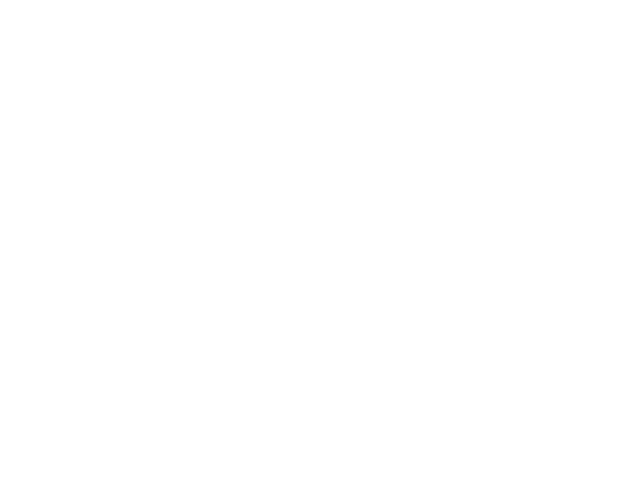

In [41]:
# Plot the decision boundary
plot_step = 0.25
plot_colors = 'br'
n_classes = 2

x_min, x_max = X["TS_hour"].min(), X["TS_hour"].max()
y_min, y_max = X["weekday"].min(), X["weekday"].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])

Z1 = Z[:,0].reshape(xx.shape).astype(int)
plt.subplot(2,1,1)
plt.title(targets[0])
cs = plt.contourf(xx, yy, Z1, cmap=plt.cm.Paired)
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.colorbar()

Z2 = Z[:,1].reshape(xx.shape).astype(int)
plt.subplot(2,1,2)
plt.title(targets[1])
cs = plt.contourf(xx, yy, Z2, cmap=plt.cm.Paired)
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.colorbar()

# Plot the training points
#for i, color in zip(range(n_classes), plot_colors):
#    idx = np.where(y == i)
#    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
#cmap=plt.cm.Paired)

#plt.axis("tight")

plt.suptitle("Decision boundaries")
plt.legend()
plt.show()


### Incorporating test data (experimental)

In [42]:
df2 = pd.read_csv('features_' + station.replace(" ","_") + '.csv')

In [43]:
df2['empty'] = df2['availableBikes'] == 0
df2['full'] = df2['availableDocks'] == 0
#df[df['empty'] == True]

try:
    df2 = df2.drop('TS_day',1)
except:
    pass

In [44]:
df2 = encode_feature(df2,'icon','icon_enum')

In [45]:
features = ['TS_hour','weekday']

targets = ['full','empty']
big_df2 = df2[features + targets].dropna(axis=0)

X = big_df2[features]
y = big_df2[targets]

X,X_test,y,y_test = train_test_split(X,y,test_size=0.2)

#dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt2 = KNeighborsClassifier(10)

dt2.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [46]:
dt2.predict([[8,5]])

array([[False, False]], dtype=bool)

In [47]:
from sklearn import metrics

In [48]:
yp = dt2.predict(X_test)

print("full")
print(metrics.confusion_matrix(y_test[targets[0]],yp[:,0]))
print("empty")
print(metrics.confusion_matrix(y_test[targets[1]],yp[:,1]))
#print(metrics.classification_report(y_test[targets[0]],yp[:,0]))
#print(metrics.classification_report(y_test[targets[1]],yp[:,1]))

full
[[5873   44]
 [ 661   39]]
empty
[[5702  129]
 [ 672  114]]


### Parameter sweep

In [49]:
# sweep over k values
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
import numpy as np

k_array = np.zeros((100))
r_test_array = np.zeros((100))
r_self_array = np.zeros((100))

for i in range(50):
    k = 2*i + 1
    dt = KNeighborsClassifier(k)
    dt.fit(X, y)
    y_self = dt.predict(X)
    yp = dt.predict(X_test)
    #print(accuracy_score(y_test['empty'],yp[:,1]))
    #print(accuracy_score(y['empty'],y_self[:,1]))
    
    r_test = recall_score(y_test['empty'],yp[:,1])
    r_self = recall_score(y['empty'],y_self[:,1])
    print("%d\t%f\t%f" % (k, r_test, r_self))
    
    k_array[i] = k
    r_test_array[i] = r_test
    r_self_array[i] = r_self



1	0.297710	0.292187
3	0.253181	0.273438
5	0.244275	0.270937
7	0.189567	0.196563
9	0.243003	0.266562
11	0.201018	0.228125
13	0.201018	0.228125
15	0.179389	0.210313
17	0.151399	0.185000
19	0.208651	0.234375
21	0.204835	0.234375
23	0.229008	0.252812
25	0.185751	0.211562
27	0.240458	0.261875
29	0.232824	0.261250
31	0.213740	0.236875
33	0.195929	0.214062
35	0.220102	0.239375
37	0.222646	0.237500
39	0.220102	0.239375
41	0.220102	0.239375
43	0.167939	0.188750
45	0.167939	0.188750
47	0.167939	0.188750
49	0.167939	0.188750
51	0.167939	0.188750
53	0.192112	0.214062
55	0.192112	0.214062
57	0.192112	0.214062
59	0.192112	0.214062
61	0.192112	0.214062
63	0.220102	0.239375
65	0.220102	0.239375
67	0.220102	0.239375
69	0.220102	0.239375
71	0.220102	0.239375
73	0.192112	0.214062
75	0.192112	0.214062
77	0.192112	0.214062
79	0.220102	0.239375
81	0.246819	0.264375
83	0.246819	0.264375
85	0.246819	0.264375
87	0.246819	0.264375
89	0.246819	0.264375
91	0.246819	0.264375
93	0.220102	0.239375
95	0.246819	0.2628

<IPython.core.display.Javascript object>


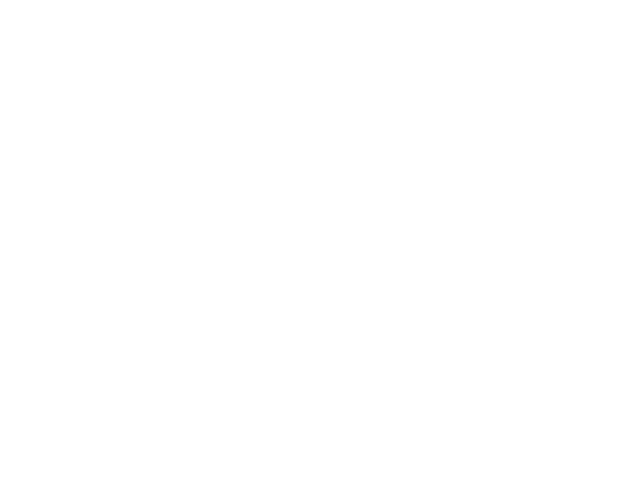

In [53]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.plot(k_array,r_test_array)
plt.plot(k_array,r_self_array,'r')
plt.show()

### K-means regressor

Instead of classifying a station as full or empty, can we predict the number of available bikes and docks?

In [60]:
from sklearn.neighbors import KNeighborsRegressor

# Targets are "empty" and "full" (2 separate classifiers OK)

#features = ['TS_hour','temperature','weekday','icon_enum']
features = ['TS_hour','weekday']

targets = ['availableBikes','availableDocks']
big_df = df[features + targets].dropna(axis=0)

X = big_df[features]
y = big_df[targets]

X,X_test,y,y_test = train_test_split(X,y,test_size=0.2)

#dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
knr = KNeighborsRegressor(10)

print(X.shape)
print(y.shape)

knr.fit(X, y)

(26466, 2)
(26466, 2)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [61]:
knr.predict([[12,1]])

array([[  0.6,  24. ]])

<IPython.core.display.Javascript object>


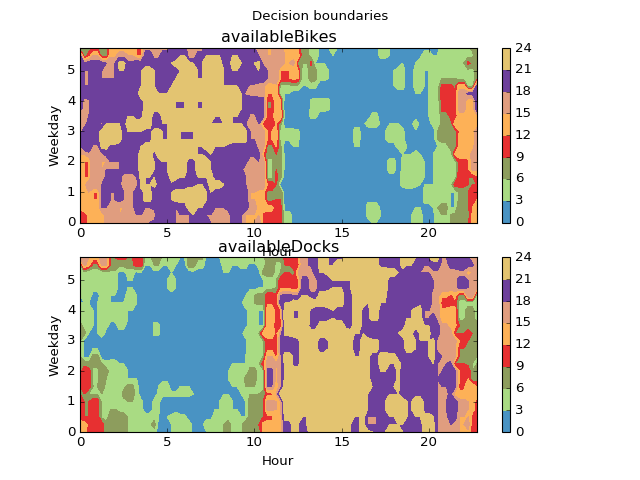

In [62]:
# Plot the decision boundary
plot_step = 0.25
plot_colors = 'br'
n_classes = 2

x_min, x_max = X["TS_hour"].min(), X["TS_hour"].max()
y_min, y_max = X["weekday"].min(), X["weekday"].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = knr.predict(np.c_[xx.ravel(), yy.ravel()])

Z1 = Z[:,0].reshape(xx.shape).astype(int)
plt.subplot(2,1,1)
plt.title(targets[0])
cs = plt.contourf(xx, yy, Z1, cmap=plt.cm.Paired)
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.colorbar()

Z2 = Z[:,1].reshape(xx.shape).astype(int)
plt.subplot(2,1,2)
plt.title(targets[1])
cs = plt.contourf(xx, yy, Z2, cmap=plt.cm.Paired)
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.colorbar()

# Plot the training points
#for i, color in zip(range(n_classes), plot_colors):
#    idx = np.where(y == i)
#    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
#cmap=plt.cm.Paired)

#plt.axis("tight")

plt.suptitle("Decision boundaries")
plt.legend()
plt.show()

### Deployment

In [63]:
#Choose and export model
from sklearn.externals import joblib

k = 30
knn_model = KNeighborsClassifier(k)
knn_model.fit(X, y)
joblib.dump(knn_model, 'knn_model.pkl') 
#knn_model = joblib.load('knn_model.pkl') 

['knn_model.pkl',
 'knn_model.pkl_01.npy',
 'knn_model.pkl_02.npy',
 'knn_model.pkl_03.npy',
 'knn_model.pkl_04.npy',
 'knn_model.pkl_05.npy',
 'knn_model.pkl_06.npy',
 'knn_model.pkl_07.npy',
 'knn_model.pkl_08.npy',
 'knn_model.pkl_09.npy',
 'knn_model.pkl_10.npy']

In [64]:
from sklearn.externals import joblib

knn_model = joblib.load('knn_model.pkl')
knn_model.predict([[10,6]])

array([[ 24.,   1.]])

In [65]:
from sklearn.externals import joblib

def run_model(hour,day):
    knn_model = joblib.load('knn_model.pkl')
    out = knn_model.predict([[hour,day]])
    return out[:,0], out[:,1]

full, empty = run_model(10,6)
print full
print empty

[ 24.]
[ 1.]


### Decision tree code generation (experimental)

In [69]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [70]:
from sklearn.externals import joblib
get_code(dt,features,['True','False'])

if ( TS_hour <= 10.5 ) {
    if ( weekday <= 0.5 ) {
        if ( TS_hour <= 5.5 ) {
            if ( TS_hour <= 0.5 ) {
                return True ( 162 examples )
                return True ( 151 examples )
                return False ( 11 examples )
            }
            else {
                if ( TS_hour <= 1.5 ) {
                    return True ( 161 examples )
                    return False ( 1 examples )
                    return True ( 162 examples )
                }
                else {
                    if ( TS_hour <= 3.5 ) {
                        if ( TS_hour <= 2.5 ) {
                            return True ( 146 examples )
                            return False ( 7 examples )
                            return True ( 153 examples )
                        }
                        else {
                            return True ( 163 examples )
                            return False ( 10 examples )
                            return True ( 173 examp